In [25]:
# Image classification using RNN's on the MNIST handwritten character recognition dataset

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

x_train shape : (37500, 32, 32, 3)
y_train shape : (37500, 1)
x_test shape : (10000, 32, 32, 3)
y_test shape : (10000, 1)



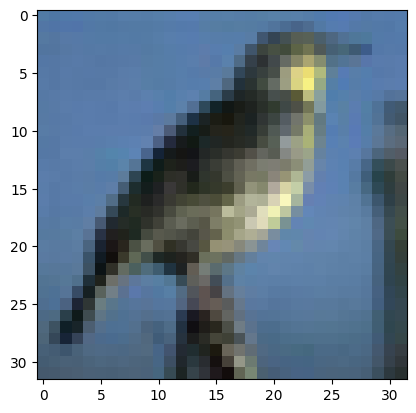

y_train : [2]


In [27]:
# Load the data using keras.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalizing the data.
x_train = x_train / 255.0
x_test = x_test / 255.0

# TTS 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25)

print("x_train shape : {}\ny_train shape : {}\nx_test shape : {}\ny_test shape : {}\n"
      .format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

plt.imshow(x_train[0], cmap='gray')
plt.show()

print("y_train : {}".format(y_train[0]))

x_train shape : (37500, 32, 32, 3)
y_train shape : (37500, 1)
x_test shape : (10000, 32, 32, 3)
y_test shape : (10000, 1)



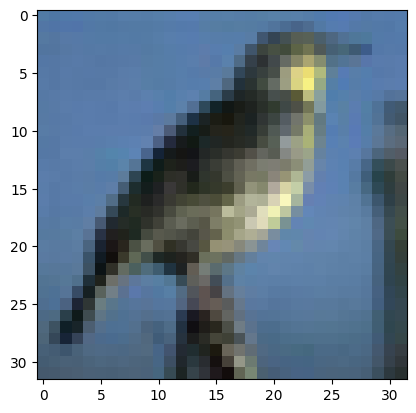

In [28]:
print("x_train shape : {}\ny_train shape : {}\nx_test shape : {}\ny_test shape : {}\n"
      .format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

plt.imshow(x_train[0], cmap='gray')
plt.show()

In [36]:
# The architecture is inspired from : 
# https://github.com/aymericdamien/TensorFlow-Examples/blob/master/tensorflow_v2/notebooks/3_NeuralNetworks/recurrent_network.ipynb

model = tf.keras.Sequential([
     tf.keras.layers.Input(shape=(32*32,1)),
     tf.keras.layers.LSTM(units=32), # units is the number of neurons for LSTM layer
     tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 32)                4352      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 4682 (18.29 KB)
Trainable params: 4682 (18.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# Make data categorical
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# For training and testing, reshape the input.
x_train_flatten = np.resize(x_train, (len(x_train), 32*32, 1))
x_test_flatten = np.resize(x_test, (len(x_test), 32*32, 1))

print(x_train_flatten.shape)

(37500, 1024, 1)


In [37]:
hist = model.fit(x_train_flatten, y_train, epochs=20)

Epoch 1/20
1172/1172 [==============================] - 765s 648ms/step - loss: 2.3036 - accuracy: 0.0988
Epoch 2/20
1172/1172 [==============================] - 676s 577ms/step - loss: 2.3031 - accuracy: 0.1027
Epoch 3/20
1066/1172 [==========================>...] - ETA: 10:52 - loss: 2.3031 - accuracy: 0.0984